# Import Libs

In [ ]:
pip install seaborn

In [5]:
# Libraries
# Data Import
import urllib.request

# Data preparetion
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Data Preprocession
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Data Normalization

# Metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 


# Model Tuning

# Models
from sklearn.dummy import DummyClassifier # Baseline Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from keras import models
from keras import layers

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Data

In [98]:
credit_data = pd.read_excel("/content/gdrive/MyDrive/ITP449_Final_project/default_data.xls")
credit_data.columns = credit_data.iloc[0]
credit_data = credit_data.iloc[1:,:].drop(columns = "ID").reset_index().drop(columns = "index")
credit_data.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [99]:
print(type(credit_data))
print (credit_data.dtypes)
credit_data = credit_data.astype(int)
print (credit_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object
0
LIMIT_BAL                     int64
SEX                 

# EDA

In [100]:
# Check for whether there is missing values
#print(credit_data.isnull().sum())
print(credit_data.info())
# Description of the data
credit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


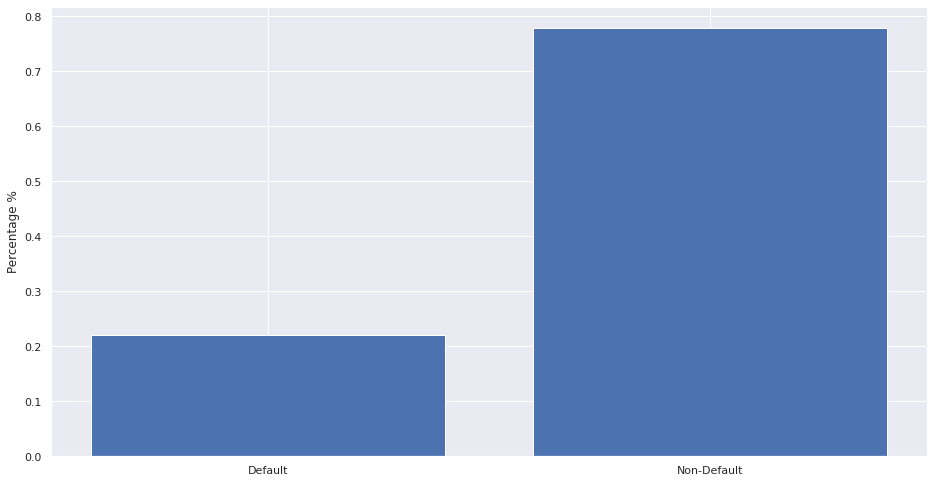

In [101]:
num_data = len(credit_data["default payment next month"])
num_def = len(credit_data[credit_data["default payment next month"]== 1])
percent_def = len(credit_data[credit_data["default payment next month"]== 1])/len(credit_data["default payment next month"])
percent_non_def = 1- percent_def
label = ["Default", "Non-Default"]
percent = [percent_def, percent_non_def]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


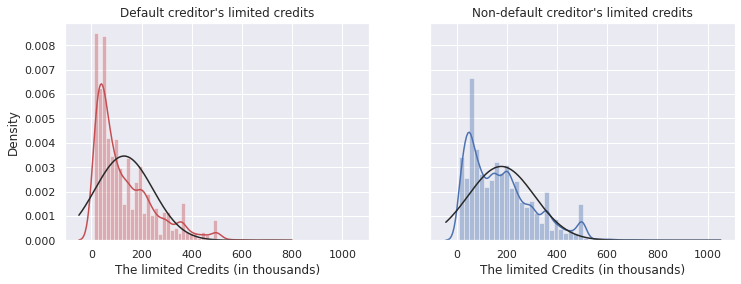

In [102]:
credit_data["sum_pay"] = credit_data.PAY_AMT1+credit_data.PAY_AMT2+credit_data.PAY_AMT3+credit_data.PAY_AMT4+credit_data.PAY_AMT5+credit_data.PAY_AMT6
credit_data["sum_pay"] = pd.to_numeric(credit_data["sum_pay"])

fig, ax = plt.subplots(1,2,figsize =(12,4), sharey= True,sharex=True)
from scipy.stats import norm
default_set = credit_data[credit_data["default payment next month"]== 1]
non_default_set = credit_data[credit_data["default payment next month"]== 0]
sns.distplot(default_set.LIMIT_BAL/1000, fit = norm, ax = ax[0], color="r")
ax[0].set(title= "Default creditor's limited credits")
ax[0].set_xlabel("The limited Credits (in thousands)")


sns.distplot(non_default_set.LIMIT_BAL/1000, fit = norm, ax = ax[1],label ="Non-default creditor's limited credits" )
ax[1].set(title= "Non-default creditor's limited credits")
ax[1].set_xlabel("The limited Credits (in thousands)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


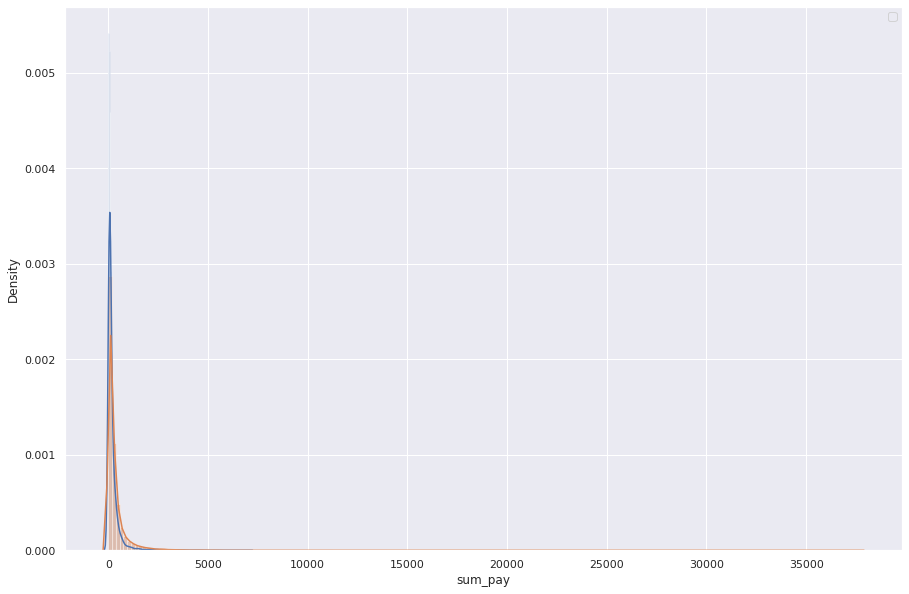

In [103]:
#d_sum_pay = dedefault_set["sum_pay"])
plt.figure(figsize= (15,10))
sns.distplot(default_set["sum_pay"]/100,bins = 200)
sns.distplot(non_default_set["sum_pay"]/100,bins = 200)
plt.legend(loc = "best")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


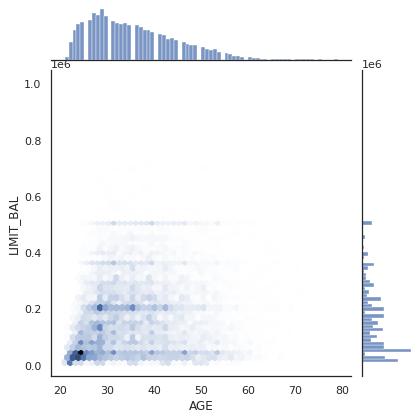

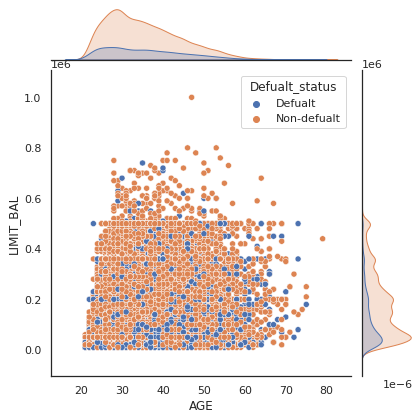

In [104]:
credit_data["Defualt_status"] = credit_data["default payment next month"]
credit_data["Defualt_status"].replace(1,"Defualt", inplace = True)
credit_data["Defualt_status"].replace(0,"Non-defualt", inplace = True)

with sns.axes_style('white'):
    g = sns.jointplot("AGE", "LIMIT_BAL", data=credit_data ,kind='hex')
    p = sns.jointplot("AGE", "LIMIT_BAL", data=credit_data ,hue = "Defualt_status")
    plt.show()


In [105]:
print(credit_data.corr())

0                           LIMIT_BAL  ...   sum_pay
0                                      ...          
LIMIT_BAL                    1.000000  ...  0.352655
SEX                          0.024755  ... -0.004882
EDUCATION                   -0.219161  ... -0.063991
MARRIAGE                    -0.108139  ... -0.011222
AGE                          0.144713  ...  0.040776
PAY_0                       -0.271214  ... -0.116810
PAY_2                       -0.296382  ... -0.092553
PAY_3                       -0.286123  ... -0.071732
PAY_4                       -0.267460  ... -0.050720
PAY_5                       -0.249411  ... -0.030362
PAY_6                       -0.235195  ... -0.014856
BILL_AMT1                    0.285430  ...  0.256381
BILL_AMT2                    0.278314  ...  0.286736
BILL_AMT3                    0.283236  ...  0.359576
BILL_AMT4                    0.293988  ...  0.354659
BILL_AMT5                    0.295562  ...  0.359819
BILL_AMT6                    0.290389  ...  0.

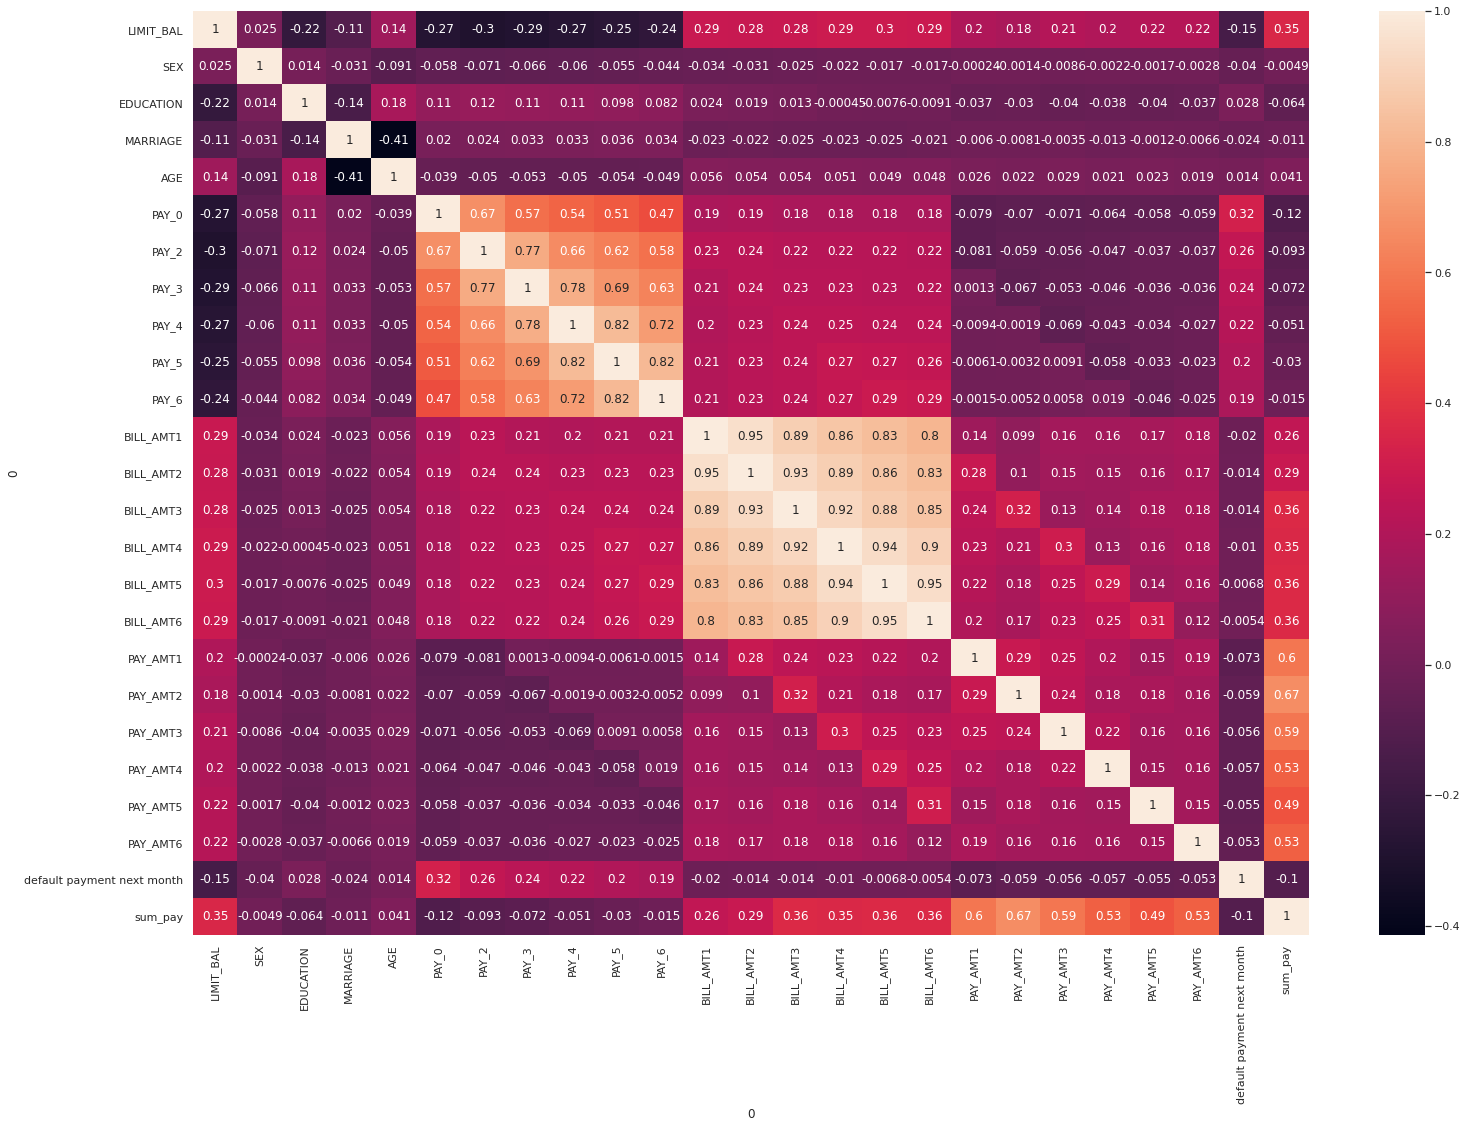

In [106]:
plt.subplots(figsize=(25,17))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

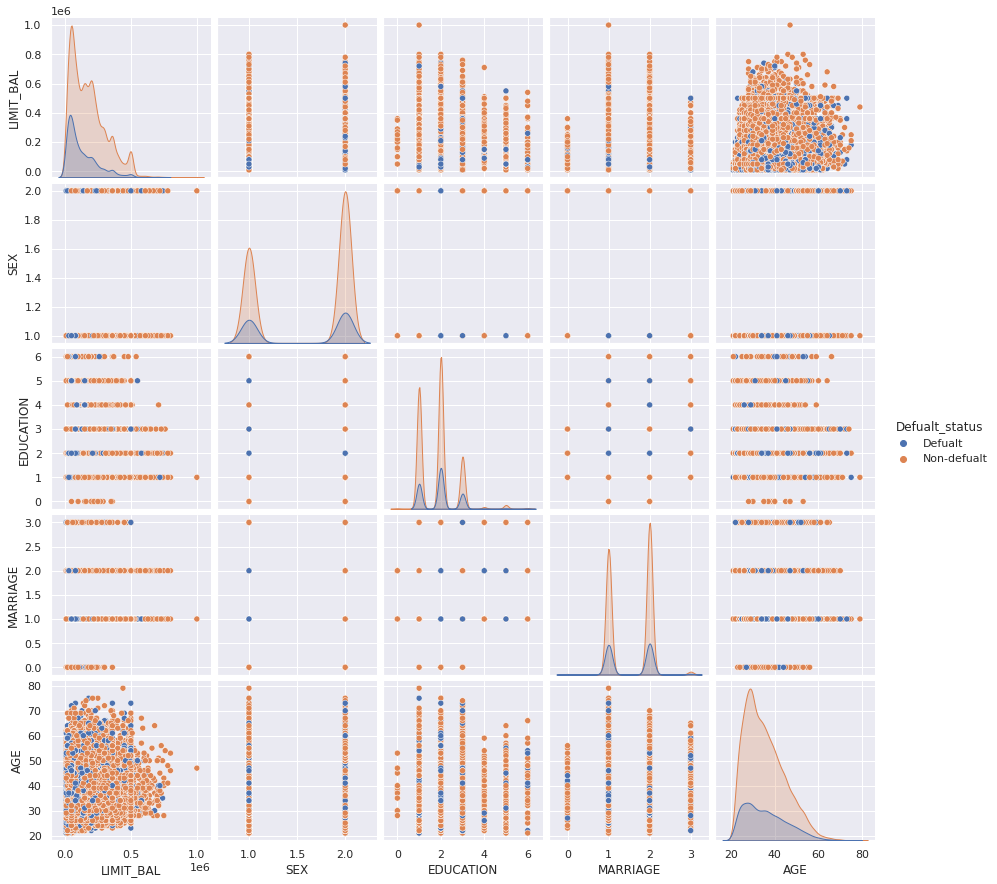

In [107]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
#plt.figure(figsize= (40,15))
sns.pairplot(credit_data[["LIMIT_BAL",	"SEX" ,	"EDUCATION",	"MARRIAGE",	"AGE","Defualt_status"]], hue = "Defualt_status")
plt.show()

# Data Preprocessing


In [108]:
credit_data["pay_diff1"]  = credit_data["PAY_0"].sub(credit_data["PAY_2"], axis = 0)
credit_data["pay_diff2"]  = credit_data["PAY_2"].sub(credit_data["PAY_3"], axis = 0)
credit_data["pay_diff3"]  = credit_data["PAY_3"].sub(credit_data["PAY_4"], axis = 0)
credit_data["pay_diff4"]  = credit_data["PAY_4"].sub(credit_data["PAY_5"], axis = 0)
credit_data["pay_diff5"]  = credit_data["PAY_5"].sub(credit_data["PAY_6"], axis = 0)

credit_data["AMT_diff1"]  = credit_data['BILL_AMT1'].sub(credit_data['BILL_AMT2'], axis = 0)
credit_data["AMT_diff2"]  = credit_data['BILL_AMT2'].sub(credit_data['BILL_AMT3'], axis = 0)
credit_data["AMT_diff3"]  = credit_data['BILL_AMT3'].sub(credit_data['BILL_AMT4'], axis = 0)
credit_data["AMT_diff4"]  = credit_data['BILL_AMT4'].sub(credit_data['BILL_AMT5'], axis = 0)
credit_data["AMT_diff5"]  = credit_data['BILL_AMT5'].sub(credit_data['BILL_AMT6'], axis = 0)

#credit_data["sum_pay0_1"] = credit_data.PAY_0+credit_data.PAY_2+credit_data.PAY_3+credit_data.PAY_4+credit_data.PAY_5+credit_data.PAY_6

In [109]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
#cols = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE",	"PAY_0",	"PAY_2",	"PAY_3",	"PAY_4",	"PAY_5",	"PAY_6",	"BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",	"default payment next month"]
#cols = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE",		"PAY_0",	"PAY_2",	"PAY_3",	"PAY_4",	"PAY_5",	"PAY_6","pay_diff1","pay_diff2","pay_diff3","pay_diff4","pay_diff5","AMT_diff1","AMT_diff2","AMT_diff3","AMT_diff4",	"AMT_diff5","default payment next month"]
#cols = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE",	"PAY_0",	"PAY_2",	"PAY_3",	"PAY_4",	"PAY_5",	"PAY_6",	"AMT_diff1","AMT_diff2","AMT_diff3","AMT_diff4",	"AMT_diff5",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",	"default payment next month"]
cols = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE",	"pay_diff1","pay_diff2","pay_diff3","pay_diff4","pay_diff5",		"AMT_diff1","AMT_diff2","AMT_diff3","AMT_diff4",	"AMT_diff5",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",	"default payment next month"]
# 目前来讲最棒的是第三行
if "Defualt_status" and "sum_pay"in credit_data.columns:
  values = credit_data.drop(columns=["Defualt_status", "sum_pay"], axis=1)[cols ]
else:
  values = credit_data[cols ]
print(values)
# Now impute it
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(values)
credit_data = pd.DataFrame(normalizedData, columns=cols)
credit_data.head(30)

0      LIMIT_BAL  SEX  ...  PAY_AMT6  default payment next month
0          20000    2  ...         0                           1
1         120000    2  ...      2000                           1
2          90000    2  ...      5000                           0
3          50000    2  ...      1000                           0
4          50000    1  ...       679                           0
...          ...  ...  ...       ...                         ...
29995     220000    1  ...      1000                           0
29996     150000    1  ...         0                           0
29997      30000    1  ...      3100                           1
29998      80000    1  ...      1804                           1
29999      50000    1  ...      1000                           1

[30000 rows x 22 columns]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_diff1,pay_diff2,pay_diff3,pay_diff4,pay_diff5,AMT_diff1,AMT_diff2,AMT_diff3,AMT_diff4,AMT_diff5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.010101,1.0,0.333333,0.333333,0.051724,0.7,0.9,0.555556,0.666667,0.636364,0.511034,0.767527,0.218358,0.529626,0.481088,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.333333,0.666667,0.086207,0.4,0.8,0.555556,0.555556,0.454545,0.511186,0.765992,0.217709,0.529428,0.481313,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.333333,0.666667,0.224138,0.7,0.6,0.555556,0.555556,0.636364,0.526029,0.766641,0.217617,0.528956,0.480390,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.7,0.6,0.555556,0.555556,0.636364,0.508896,0.765946,0.228644,0.528925,0.480405,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.6,0.7,0.444444,0.555556,0.636364,0.513258,0.752684,0.225561,0.531577,0.481105,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
5,0.040404,0.0,0.166667,0.666667,0.275862,0.7,0.6,0.555556,0.555556,0.636364,0.517823,0.766182,0.237384,0.529382,0.480617,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513,0.0
6,0.494949,0.0,0.166667,0.666667,0.137931,0.7,0.6,0.555556,0.555556,0.636364,0.464314,0.751400,0.168500,0.594465,0.491605,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047,0.0
7,0.090909,1.0,0.333333,0.666667,0.034483,0.8,0.6,0.444444,0.555556,0.727273,0.522160,0.766327,0.218201,0.530040,0.480245,0.000435,0.000357,0.000000,0.000936,0.003955,0.002917,0.0
8,0.131313,1.0,0.500000,0.333333,0.120690,0.7,0.4,0.777778,0.555556,0.636364,0.507263,0.767334,0.217956,0.530081,0.490462,0.003811,0.000000,0.000482,0.001610,0.002345,0.001892,0.0
9,0.010101,0.0,0.500000,0.666667,0.241379,0.7,0.6,0.555556,0.444444,0.636364,0.510190,0.766428,0.218009,0.515488,0.480037,0.000000,0.000000,0.000000,0.020945,0.002631,0.000000,0.0


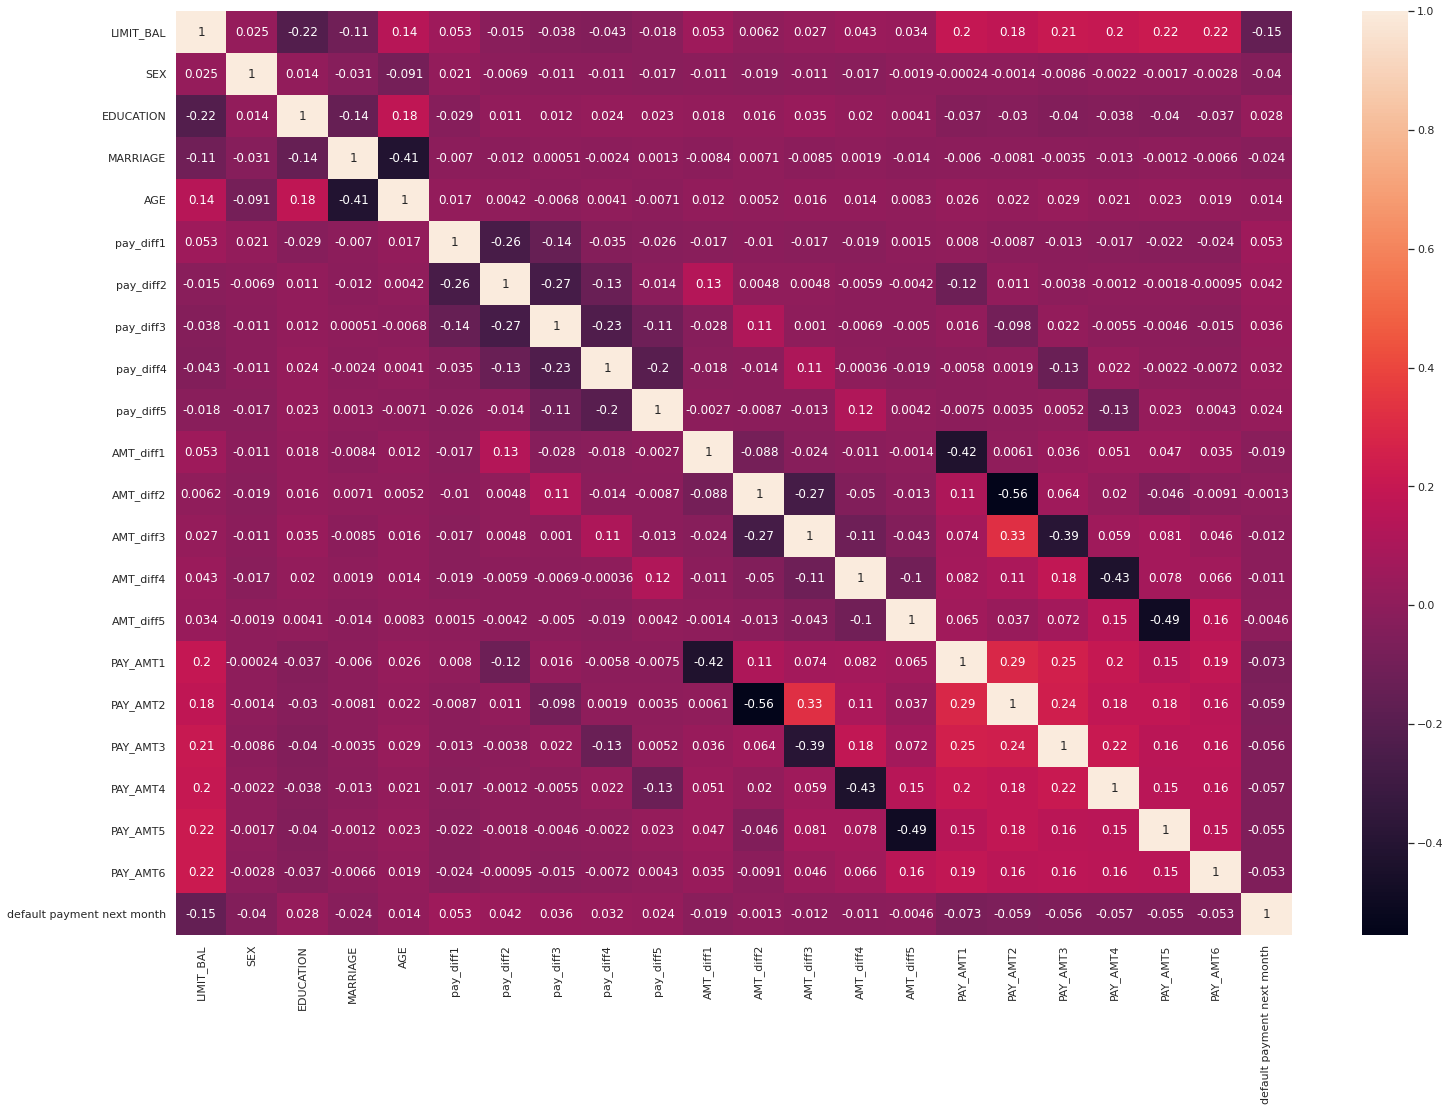

In [110]:
plt.subplots(figsize=(25,17))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

In [111]:
print(values.shape)

(30000, 22)


In [112]:
X = credit_data[cols].drop(columns=["default payment next month"])
y = credit_data["default payment next month"]

print(y.head())

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: default payment next month, dtype: float64


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify=y)
print(type(y_train))

<class 'pandas.core.series.Series'>


## Undersampling

In [114]:
from imblearn.under_sampling import NearMiss
ns =NearMiss(ratio='not minority')

X_train, y_train = ns.fit_sample(X_train, y_train)
print(pd.DataFrame(y_train).value_counts())
X_test, y_test = ns.fit_sample(X_test, y_test)
print(pd.DataFrame(y_test).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1.0    4645
0.0    4645
dtype: int64
1.0    1991
0.0    1991
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Modelling


## Baseline Model

In [115]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train,y_train)
baseline_pred = dummy_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test,baseline_pred)
print("Baseline Accuracy is:", baseline_accuracy)

Baseline Accuracy is: 0.5


## Logistic Regression

In [116]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [117]:
lr_brforetune_cv_scores = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=10, n_jobs=-1)
mean_lr_brforetune_cv_score = lr_brforetune_cv_scores.mean()
print("The cross-validation accuracy score for untuned logistic regression after a 10 fold cross validation:", mean_lr_brforetune_cv_score)

The cross-validation accuracy score for untuned logistic regression after a 10 fold cross validation: 0.6333692142088267


In [118]:
print(logReg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [119]:
grid={"C":np.logspace(-20,20,20)  , 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
grid_lr=GridSearchCV(logReg,grid,cv=10, n_jobs=-1)
grid_lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-20, 1.27...
       6.95192796e-04, 8.85866790e-02, 1.12883789e+01, 1.43844989e+03,
       1.83298071e+05, 2.33572147e+07, 2.97635144e+09, 3.79269019e+11,
       4.83293024e+13, 6.15848211e+15, 7.84759970e+17, 1.00000000e+20]),
                         'max_iter': [100, 1000, 2500, 5000],
               

In [120]:
best_hyperparams = grid_lr.best_params_
print("Best hyperparameters: \n", best_hyperparams )
mean_lr_aftertune_cv_score = grid_lr.best_score_
print("The cross-validation accuracy score for tuned logistic regression after a 10 fold cross validation:\n", mean_lr_aftertune_cv_score )
best_lr_model = grid_lr.best_estimator_ 

Best hyperparameters: 
 {'C': 11.288378916846836, 'max_iter': 100, 'solver': 'lbfgs'}
The cross-validation accuracy score for tuned logistic regression after a 10 fold cross validation:
 0.6371367061356297


In [121]:
best_lr_fit_for_train_data = cross_val_score(estimator=best_lr_model, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
print(best_lr_fit_for_train_data)
best_lr_fit_for_test_data = cross_val_score(estimator=best_lr_model, X=X_test, y=y_test, cv=10, n_jobs=-1).mean()
print(best_lr_fit_for_test_data)

0.6371367061356297
0.6418552663064696


## Decision Tree

In [122]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#dt_predict = dt.predict(X_test)
#accuracy_score(y_test,dt_predict)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
# Cross Validation for the model
dt_brforetune_cv_scores  = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
mean_dt_brforetune_cv_score = dt_brforetune_cv_scores.mean()
print("The cross-validation accuracy score for untuned decisionTree model after a 10 fold cross validation:",  mean_dt_brforetune_cv_score)

The cross-validation accuracy score for untuned decisionTree model after a 10 fold cross validation: 0.7571582346609256


In [171]:
# HyperParameter Tuning
print(dt.get_params())
params_dt = {
            'max_depth': [100,600],
            'min_samples_leaf':[50,100,1000], #100/1000/5000
            'max_features': [4,5, 6] #4/6/5,
             }
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring="accuracy", cv=10, n_jobs=-1)
grid_dt.fit(X_train,y_train)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [100, 600], 'max_features': [4, 5, 6],
  

In [172]:
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters: \n", best_hyperparams )
dt_aftertune_cv_scores = grid_dt.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 10 fold cross validation:\n",  dt_aftertune_cv_scores)
best_dt_model = grid_dt.best_estimator_

Best hyperparameters: 
 {'max_depth': 100, 'max_features': 6, 'min_samples_leaf': 50}
The cross-validation accuracy score for tuned decisionTree model after a 10 fold cross validation:
 0.7972012917115178


In [173]:
best_dt_fit_for_train_data = cross_val_score(estimator=best_dt_model, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
print(best_dt_fit_for_train_data)
best_dt_fit_for_test_data = cross_val_score(estimator=best_dt_model, X=X_test, y=y_test, cv=10, n_jobs=-1).mean()
print(best_dt_fit_for_test_data)

0.8026910656620021
0.7933199833755242


## Random Forest

In [127]:
print(X_train)

[[2.02020202e-02 1.00000000e+00 3.33333333e-01 ... 1.93236715e-03
  3.04785841e-03 2.45901949e-03]
 [2.02020202e-02 1.00000000e+00 3.33333333e-01 ... 1.61030596e-03
  2.34450647e-03 1.89155346e-03]
 [2.02020202e-02 1.00000000e+00 3.33333333e-01 ... 1.61030596e-03
  2.29996085e-03 1.91046899e-03]
 ...
 [3.23232323e-01 1.00000000e+00 1.66666667e-01 ... 2.08099839e-02
  4.25762375e-03 3.22509864e-02]
 [1.71717172e-01 0.00000000e+00 3.33333333e-01 ... 1.03349436e-02
  3.04785841e-02 0.00000000e+00]
 [4.04040404e-02 0.00000000e+00 3.33333333e-01 ... 4.71819646e-04
  3.28230906e-03 7.56621383e-04]]


In [128]:
# Random Forest model
# Enter your code here
rf_model = RandomForestClassifier(n_estimators = 10000, max_features = 10, random_state = 42) 
rf_model.fit(X_train,y_train)

#print(classification_report(y_test,rf_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# 10 fold cross validation
rf_brforetune_cv_scores = cross_val_score(estimator= rf_model, X=X_train, y=y_train, cv=10, n_jobs=-1)
mean_rf_brforetune_cv_score =rf_brforetune_cv_scores.mean()
print("The cross-validation accuracy score for untuned Random Forest model after a 10 fold cross validation:", mean_rf_brforetune_cv_score)

In [130]:
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [131]:
print(rf_model.get_params())
params_rf ={
          'n_estimators': [100,300,400,500, 600,1000],
          'criterion': ["gini", "entropy"],
          'max_depth': [100,200, 300, 400, 1000],
          'max_features': ["log2", "sqrt"],
          'bootstrap':[True, False]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf ,cv = 3, scoring="neg_mean_squared_error", verbose = 1, n_jobs=-1)
grid_rf.fit(X_train,y_train)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  7.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=10,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10000, n_jobs=None,
                                              oo...andom_state=42,
                                              ver

In [132]:
best_hyperparams = grid_rf.best_params_
print("Best hyperparameters: \n", best_hyperparams )
best_rf = grid_rf.best_estimator_

Best hyperparameters: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 300}


In [133]:
best_rf_fit_for_train_data = cross_val_score(estimator=best_rf, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
print(best_rf_fit_for_train_data)
best_rf_fit_for_test_data = cross_val_score(estimator=best_rf, X=X_test, y=y_test, cv=10, n_jobs=-1).mean()
print(best_rf_fit_for_test_data)

0.8485468245425188
0.8495680155161773


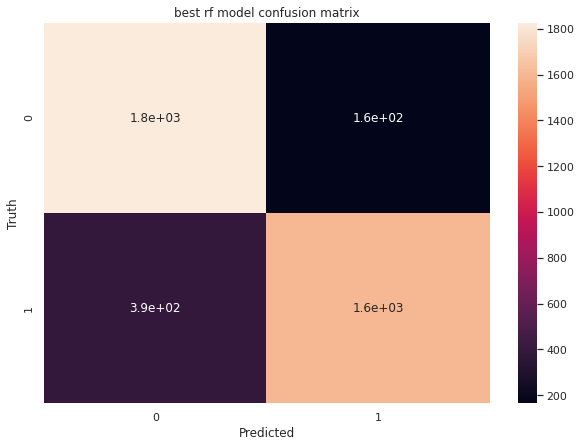

In [134]:
matrix = confusion_matrix(y_test, best_rf.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best rf model confusion matrix")
plt.show()

In [135]:
# Top 3 features for RandomForest
# Enter your code here

important_features = best_rf.feature_importances_
features_name = X.columns
imp_feature_frame = pd.DataFrame({'features': features_name, 'importance': important_features}).sort_values(by = "importance", ascending =False)
print(imp_feature_frame)
print(list(imp_feature_frame.features))

     features  importance
5   pay_diff1    0.081438
4         AGE    0.064954
15   PAY_AMT1    0.059619
0   LIMIT_BAL    0.057430
16   PAY_AMT2    0.056671
6   pay_diff2    0.054884
18   PAY_AMT4    0.052768
10  AMT_diff1    0.052588
13  AMT_diff4    0.052417
9   pay_diff5    0.051112
17   PAY_AMT3    0.049755
7   pay_diff3    0.049011
19   PAY_AMT5    0.048217
12  AMT_diff3    0.047384
11  AMT_diff2    0.047196
8   pay_diff4    0.045005
14  AMT_diff5    0.044896
20   PAY_AMT6    0.044675
2   EDUCATION    0.017341
3    MARRIAGE    0.012268
1         SEX    0.010370
['pay_diff1', 'AGE', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2', 'pay_diff2', 'PAY_AMT4', 'AMT_diff1', 'AMT_diff4', 'pay_diff5', 'PAY_AMT3', 'pay_diff3', 'PAY_AMT5', 'AMT_diff3', 'AMT_diff2', 'pay_diff4', 'AMT_diff5', 'PAY_AMT6', 'EDUCATION', 'MARRIAGE', 'SEX']


## AdaBoosting

In [136]:
base_dt = best_dt_model
ada_boost_model = AdaBoostClassifier(base_estimator= base_dt, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost_model.fit(X_train, y_train)
ada_predict = ada_boost_model.predict(X_test)
print("AdaBoost Classification's Accuracy is:", accuracy_score(y_test, ada_predict))

AdaBoost Classification's Accuracy is: 0.8528377699648418


In [137]:
print(ada_boost_model.get_params())

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 100, 'base_estimator__max_features': 6, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 50, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None

In [138]:
grid_ada = {'n_estimators':[100,300,500,600],
       'learning_rate':[0.01,0.08, 0.1, 0.5, 1.0]}
grid_ada = GridSearchCV(estimator=ada_boost_model, param_grid=grid_ada, scoring="accuracy", cv=10, n_jobs=-1)
grid_ada.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=100,
                                                                                max_features=6,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=50,
   

In [139]:
best_hyperparams = grid_ada.best_params_
print("Best hyperparameters: \n", best_hyperparams )
ada_aftertune_cv_scores = grid_ada.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 10 fold cross validation:\n",  ada_aftertune_cv_scores)
best_ada_model = grid_ada.best_estimator_

Best hyperparameters: 
 {'learning_rate': 0.01, 'n_estimators': 500}
The cross-validation accuracy score for tuned decisionTree model after a 10 fold cross validation:
 0.85016146393972


In [140]:
best_ada_fit_for_train_data = cross_val_score(estimator=best_ada_model, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
print(best_ada_fit_for_train_data)
best_ada_fit_for_test_data = cross_val_score(estimator=best_ada_model, X=X_test, y=y_test, cv=10, n_jobs=-1).mean()
print(best_ada_fit_for_test_data)

0.85016146393972
0.8457985415800808


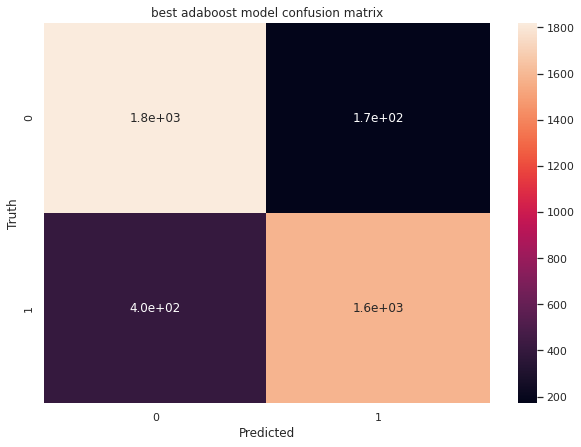

In [141]:
matrix = confusion_matrix(y_test, best_ada_model.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("best adaboost model confusion matrix")
plt.show()

## Accuracy Ranking


In [174]:
dict_accuracy = {"Model":["AdaBoost Classifier","Random Forest Classifier", "Decision Tree Classifier", "Logistic Regression","Baseline Model"],
                 "Accuracy for train data": [best_ada_fit_for_train_data ,best_rf_fit_for_train_data,best_dt_fit_for_train_data, best_lr_fit_for_train_data, baseline_accuracy ],
                 "Accuracy for test data": [best_ada_fit_for_test_data ,best_rf_fit_for_test_data,  best_dt_fit_for_test_data, best_lr_fit_for_test_data, baseline_accuracy ]}
#baseline_accuracy
#mean_lr_aftertune_cv_score
#dt_aftertune_cv_scores 
#bag_aftertune_bag_cv_scores
#mean_rf_score 
#ada_aftertune_cv_scores
#mean_voting_score
#neural_aftertuned_cv_score
#"General Model cv Accuracy":[ada_aftertune_cv_scores,mean_rf_score,dt_aftertune_cv_scores ,mean_lr_aftertune_cv_score,baseline_accuracy],
df_acc = pd.DataFrame(dict_accuracy).sort_values(by="Accuracy for test data",ascending= False)

df_acc

,Model,Accuracy for train data,Accuracy for test data
1,Random Forest Classifier,0.848547,0.849568
0,AdaBoost Classifier,0.850161,0.845799
2,Decision Tree Classifier,0.802691,0.793320
3,Logistic Regression,0.637137,0.641855
4,Baseline Model,0.500000,0.500000


In [143]:
# This is Creditor Number 16 whose payment is default 
best_rf.predict([[0.010101,	0.0,	0.166667,	0.666667,	0.051724,	0.7,	0.4,	0.555556,	0.555556,	0.636364,	0.507447,	0.766693,	0.217547,	0.530097,	0.479696,	0.003663,	0.000000,	0.001674,	0.000000,	0.003868,	0.000000	]])

array([1.])